In [2]:
import pandas as pd
import numpy as np
import os

import pandas as pd
df = pd.read_csv("csvs/dataICdistribution.csv", index_col=0)

In [3]:
from collections import OrderedDict
import rebound
import reboundx
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import sys

from ic import output, initialize, plotsa, integrate, plot
path = '/scratch/dtamayo/selectic/data/'
planets = ['b', 'c', 'd', 'e', 'f', 'g', 'h']
resonances = OrderedDict([(('b','c'),(8,5)),(('c','d'),(5,3)),(('d','e'),(3,2)),(('e','f'),(3,2)),(('f','g'),(4,3)),(('g','h'),(3,2))]) # ordered so we add planets in right sequence
threebodyresonances = OrderedDict([(('b','c','d'),(2,3)),(('c','d','e'),(1,2)),(('d','e','f'),(2,3)),(('e','f','g'),(1,2)),(('f','g','h'),(1,1))])
outputs = initialize(planets, resonances, threebodyresonances)

In [4]:
df['max3MMRlibampf'] = df[['phi3bodylibampfbcd', 'phi3bodylibampfcde', 'phi3bodylibampfdef', 'phi3bodylibampfefg', 'phi3bodylibampffgh']].max(axis=1)
df['max3MMRlibamp1'] = df[['phi3bodylibamp1bcd', 'phi3bodylibamp1cde', 'phi3bodylibamp1def', 'phi3bodylibamp1efg', 'phi3bodylibamp1fgh']].max(axis=1)
df['max1storder3MMRlibampf'] = df[['phi3bodylibampfdef', 'phi3bodylibampfefg', 'phi3bodylibampffgh']].max(axis=1)
df['max1storder3MMRlibamp1'] = df[['phi3bodylibamp1def', 'phi3bodylibamp1efg', 'phi3bodylibamp1fgh']].max(axis=1)
df['maxerms1'] = df[['erms1b', 'erms1c', 'erms1d', 'erms1e', 'erms1f', 'erms1g', 'erms1h']].max(axis=1)
df['maxermsf'] = df[['ermsfb', 'ermsfc', 'ermsfd', 'ermsfe', 'ermsff', 'ermsfg', 'ermsfh']].max(axis=1)
df['max2MMRlibampf'] = df[['phi2bodylibampfbc', 'phi2bodylibampfcd', 'phi2bodylibampfde', 'phi2bodylibampfef', 'phi2bodylibampffg', 'phi2bodylibampfgh']].max(axis=1)
df['max2MMRlibamp1'] = df[['phi2bodylibamp1bc', 'phi2bodylibamp1cd', 'phi2bodylibamp1de', 'phi2bodylibamp1ef', 'phi2bodylibamp1fg', 'phi2bodylibamp1gh']].max(axis=1)
df['max1storder2MMRlibampf'] = df[['phi2bodylibampfde', 'phi2bodylibampfef', 'phi2bodylibampffg', 'phi2bodylibampfgh']].max(axis=1)
df['max1storder2MMRlibamp1'] = df[['phi2bodylibamp1de', 'phi2bodylibamp1ef', 'phi2bodylibamp1fg', 'phi2bodylibamp1gh']].max(axis=1)

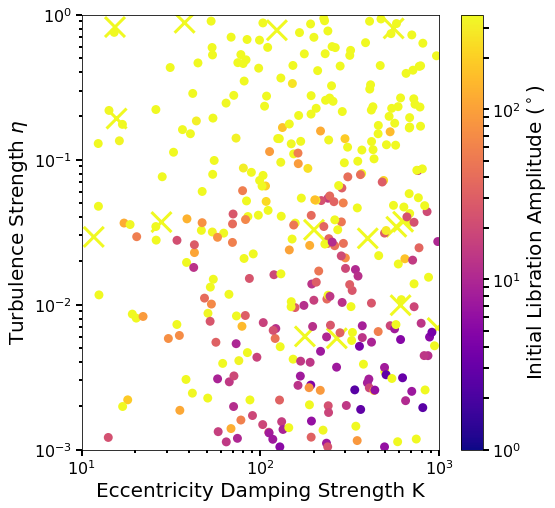

In [5]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.style.use('paper')

fig, ax0 = plt.subplots(figsize=(8,8))

cm = plt.cm.get_cmap('plasma')
dfunstable = df[df['Eerrf']>1.e-2]
sc = ax0.scatter(dfunstable['K'], dfunstable['mag'], c=dfunstable['max3MMRlibamp1'], edgecolor='', vmin=1, vmax=360, s=400,cmap=cm, marker='x', norm=mpl.colors.LogNorm())        
dfstable = df[df['Eerrf']<1.e-2]
sc = ax0.scatter(dfstable['K'], dfstable['mag'], c=dfstable['max3MMRlibamp1'], edgecolor='', vmin=1, vmax=360, s=80,cmap=cm, norm=mpl.colors.LogNorm())        

ax0.set_xlabel('Eccentricity Damping Strength K')
ax0.set_ylabel('Turbulence Strength '+r'$\eta$')  
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_xlim([10,1000])
ax0.set_ylim([1.e-3, 1])

cbar = fig.colorbar(sc)
cbar.ax.set_ylabel('Initial Libration Amplitude ($^\circ$)')
fig.savefig('initialconditions.pdf')